## Callsheet Duration Analysis

* Comparison of Total Duration of Callsheets
* Comparison of Days Callsheets are With APT
* The Relationship Between Total Hours Worked and Duration
* The Relationship Between Total Hours Worked and Days With APT
* The relationship Between Duration and Profitablitiy on Chargeable Callsheets


In [1]:
# Standard Imports
import numpy as np
import pandas as pd

In [2]:
# Stats Imports
from scipy import stats

In [3]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

Next we need to import the raw data. Below is a sample of data imported.

In [5]:
df = pd.read_csv('data/Callsheet Detail.csv')
df.tail(2)

,Call No,Taken Date,Closed Date,Closed Year,Days With APT,Days With Customer,Total Days,Chargeable,Project Work,Quote Time,Time Hours Estimated,Time Hours Total
11269,158256,9 Jan 2013,9 Jan 2013,2013,0,0,0,N,N,0,0.0,0.32
11270,158257,9 Jan 2013,13 Mar 2013,2013,45,0,45,N,N,0,0.0,3.57


We are only interested in the non project data so we will filter our data frame to only include project data and slice an array containing the days with apt and an array with the total days open for each year.

In [6]:
df = df[df['Project Work'] != 'Y']
df = df[df['Total Days'] < 365]
df = df[df['Days With APT'] > 0]
df_quoted = df[df['Quote Time'] > 0]

### Total Duration of Callsheets

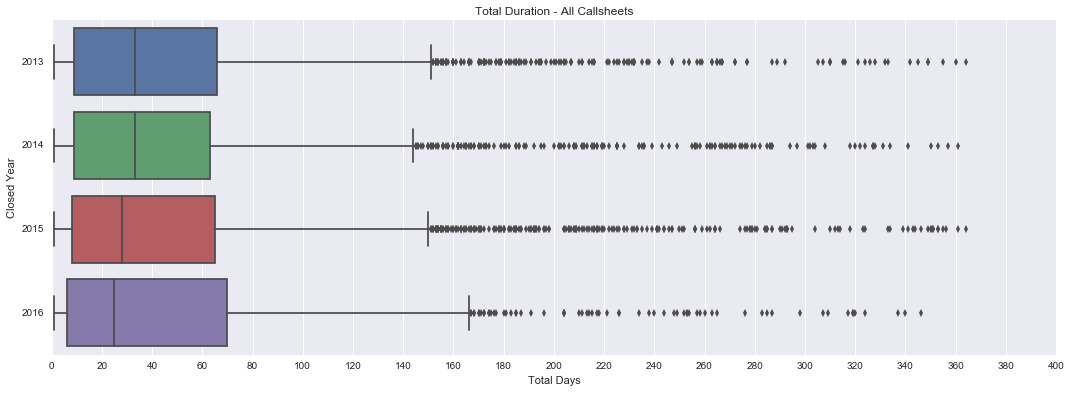

In [7]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Total Days", data=df, orient="h", )
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Total Duration - All Callsheets");

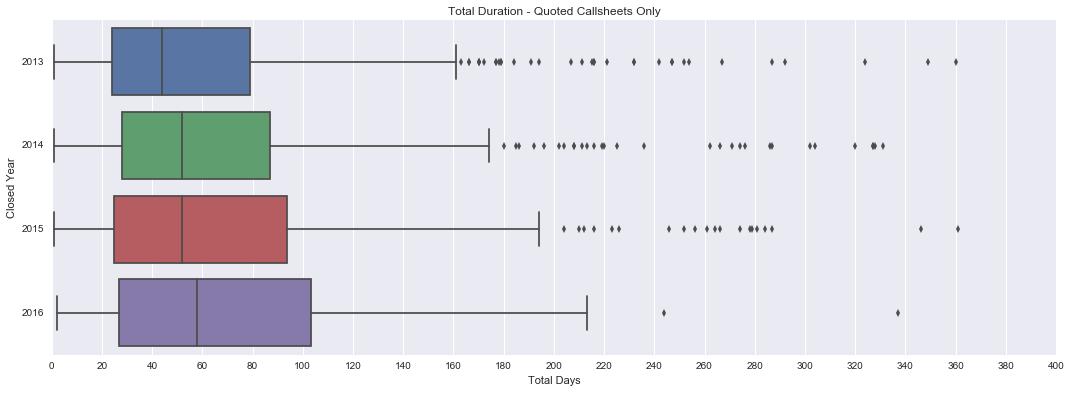

In [8]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Total Days", data=df_quoted, orient="h", )
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Total Duration - Quoted Callsheets Only");

### Days Callsheets are With APT

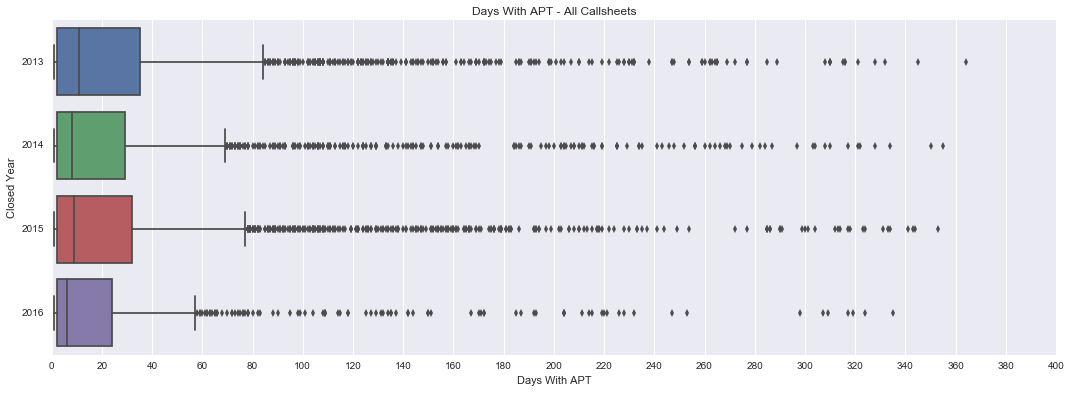

In [9]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Days With APT", data=df, orient="h")
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Days With APT - All Callsheets");

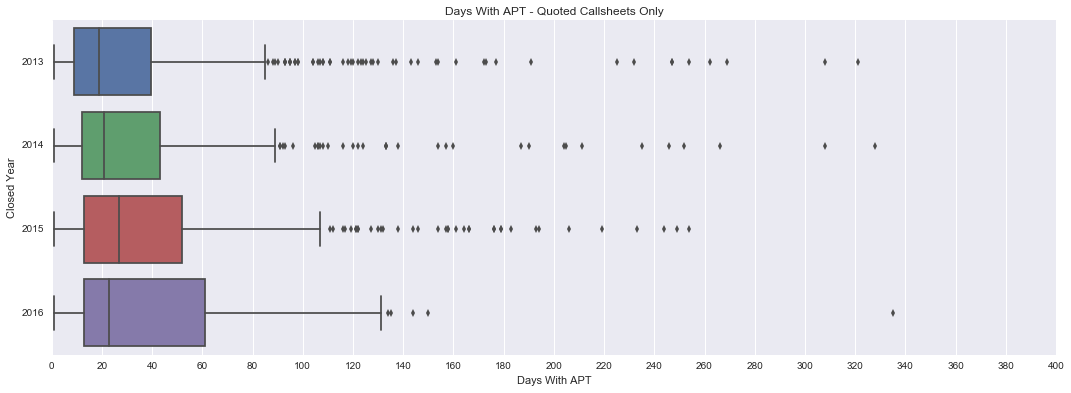

In [10]:
plt.figure(figsize=(18, 6));
ax = sns.boxplot(y="Closed Year", x="Days With APT", data=df_quoted, orient="h")
ax.set_xticks(np.linspace(0,400,21));
ax.set_title("Days With APT - Quoted Callsheets Only");

In [13]:
df_quoted["Profit"] = df_quoted["Quote Time"] - df_quoted["Time Hours Total"]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(-0.12847580227476044, 7.726954619837938e-07)

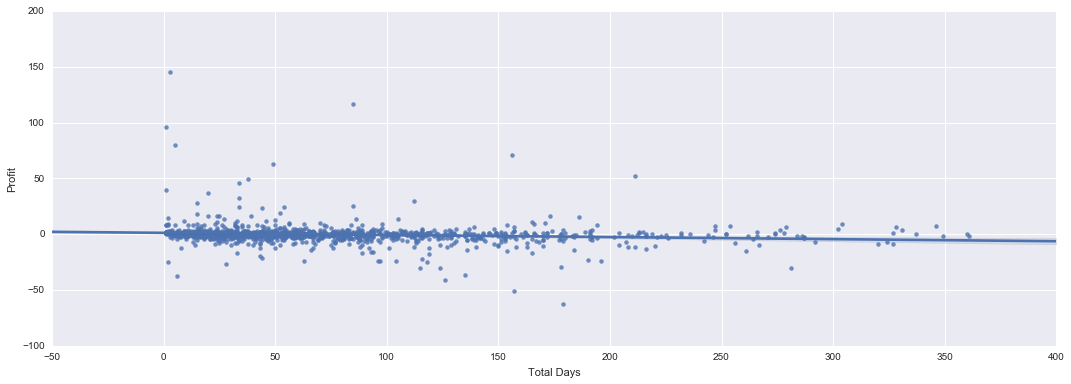

In [14]:
plt.figure(figsize=(18, 6));
sns.regplot("Total Days", "Profit" , df_quoted);
stats.pearsonr(df_quoted["Total Days"] , df_quoted["Profit"])

(-0.13083607105673636, 4.8106439999239213e-07)

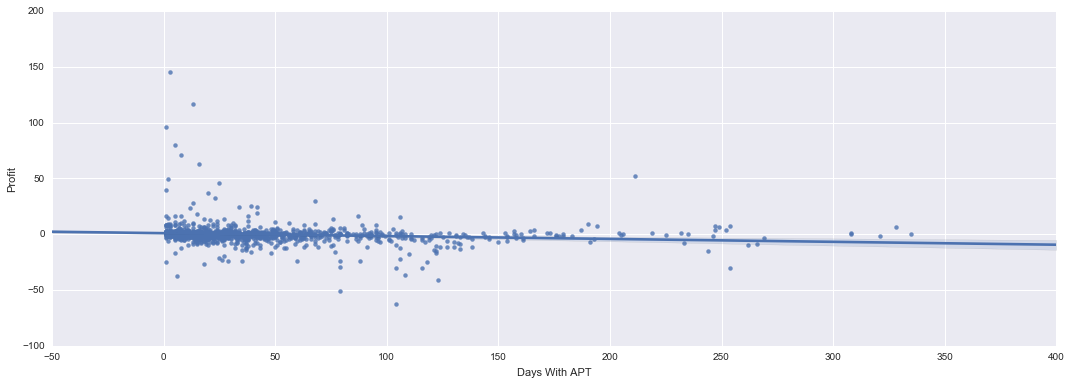

In [15]:
plt.figure(figsize=(18, 6));
sns.regplot("Days With APT", "Profit" , df_quoted);
stats.pearsonr(df_quoted["Days With APT"] , df_quoted["Profit"])

(-0.16337536034326505, 0.14761026770437238)

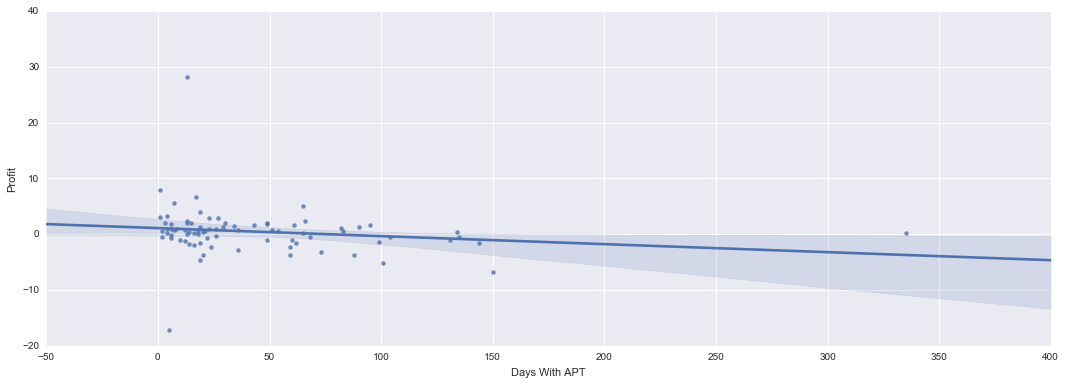

In [16]:
df_quoted_16 = df_quoted[df_quoted['Closed Year'] == 2016]
plt.figure(figsize=(18, 6));
sns.regplot("Days With APT", "Profit" , df_quoted_16);
stats.pearsonr(df_quoted_16["Days With APT"] , df_quoted_16["Profit"])